In [44]:
# prepare python
%pylab inline
import numpy as np
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## I. Polynomial Dataset

In [147]:
# simulate population
pop1_X, pop1_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=0) 
pop2_X, pop2_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=100) 
pop3_X, pop3_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=-100) 

In [148]:
# 3rd order polynomial
pop1_Y = pop1_Y**3
pop2_Y = pop2_Y**3
pop3_Y = pop3_Y**3

In [149]:
# combine as matrix 
pop_X = np.concatenate((pop1_X,pop2_X,pop3_X))
pop_Y = np.concatenate((pop1_Y, 2 * pop2_Y, -2 * pop3_Y))

In [150]:
# Add intercept to covariates 
pop_X = np.append(np.vstack(np.ones(len(pop_X))),pop_X,1)
pop_X.shape

(300, 2)

In [151]:
pop_Y = np.vstack(pop_Y)

In [152]:
### plot
mycmap = cm.brg 
fig = plt.figure(figsize(6,6), dpi=1600) 
plt.subplots_adjust(hspace=.5)            
gridsize = (1,1)
ax0 = plt.subplot2grid(gridsize,(0,0))
sc = ax0.scatter(pop_X[:,1], pop_Y, s=100, alpha=.4, c=range(len(pop_X)), cmap=mycmap) 
plt.colorbar(sc, ax=ax0)


## II. SGD

In [153]:
## parameters
n_learning_rate = 0.1 
# same prediction and cost function as before 
## Specify prediction function
def fx(theta, X):
    return np.dot(X, theta)
 
## specify cost function
def fcost(theta, X, y):
    return (1./2*len(X)) * sum((fx(theta,X) - y)**2) 

In [154]:
## specify function to calculate gradient at a given theta - returns a vector of length(theta)
# different from gradient descent method 
# not summing up the gradients 
def gradient(theta, X, y):
    grad_theta = (1./len(X)) * np.multiply((fx(theta, X)) - y, X) 
    return grad_theta

In [155]:
### DO stochastic gradient descent
# starting values for alpha & beta
theta = [0,0]

In [156]:
# store starting theta & cost
arraytheta = np.array([theta])
arraycost = np.array([])
 

In [157]:
# feed data through and update theta; capture cost and theta history
for i in range(0, len(pop_X)):
    
    # calculate cost for theta on CURRENT point
    cost = fcost(theta, pop_X[i], pop_Y[i])
    arraycost = np.append(arraycost, cost)
    
    # update theta with gradient descent
    theta = theta - n_learning_rate * gradient(theta, pop_X[i], pop_Y[i])
    arraytheta = np.vstack([arraytheta, theta])

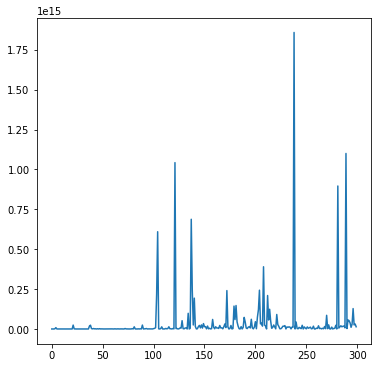

In [158]:
# plot the prediction error 
plt.plot(arraycost)

## III.Nestrov 

In [159]:
theta_NAG = np.array([0,0])
d=np.array([0,0])

In [160]:
# store starting theta & cost
arraytheta_NAG = np.array([theta_NAG])
arraycost_NAG = np.array([])

In [161]:
## parameters
n_learning_rate = 0.2
beta = 0.9

In [162]:
for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_NAG, pop_X[i], pop_Y[i])
    arraycost_NAG = np.append(arraycost_NAG, cost)
    
    # update theta with gradient descent
    d = beta*d + gradient(theta_NAG-n_learning_rate*beta*d, pop_X[i], pop_Y[i])
    theta_NAG = theta_NAG - n_learning_rate*d
    
    arraytheta_NAG = np.vstack([arraytheta_NAG, theta_NAG])

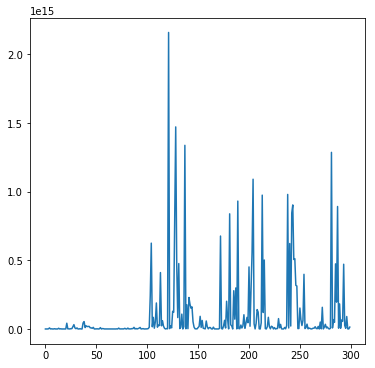

In [163]:
# plot the prediction error 
plt.plot(arraycost_NAG)

## IV. AdaGrad

In [164]:
theta_ada = np.array([0,0])
G = np.zeros(pop_X.shape[1])

In [165]:
# store starting theta & cost
arraytheta_ada = np.array([theta_ada])
arraycost_ada = np.array([])

In [166]:
## parameters
n_learning_rate = 100
eps = 10**-8

In [167]:
for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_ada, pop_X[i], pop_Y[i])
    arraycost_ada = np.append(arraycost_ada, cost)
    
    # update theta with gradient descent
    grad = gradient(theta_ada, pop_X[i], pop_Y[i])
    G += grad*grad
    theta_ada = theta_ada - n_learning_rate*grad/np.sqrt(eps+G)
    
    arraytheta_ada = np.vstack([arraytheta_ada, theta_ada])

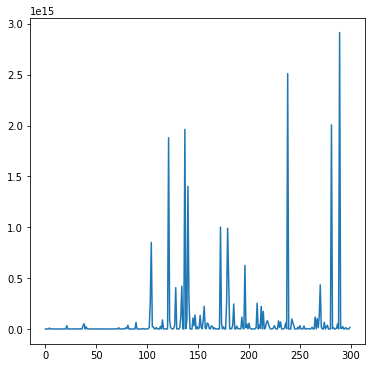

In [168]:
# plot the prediction error 
plt.plot(arraycost_ada)

## V. RMSprop

In [169]:
theta_rms = np.array([0,0])
G = np.zeros(pop_X.shape[1])

In [170]:
# store starting theta & cost
arraytheta_rms = np.array([theta_rms])
arraycost_rms = np.array([])

In [171]:
## parameters
n_learning_rate = 10
eps = 10**-8

In [172]:
for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_rms, pop_X[i], pop_Y[i])
    arraycost_rms = np.append(arraycost_rms, cost)
    
    # update theta with gradient descent
    grad = gradient(theta_rms, pop_X[i], pop_Y[i])
    G = 0.9*G + 0.1*grad*grad
    theta_rms = theta_rms - n_learning_rate*grad/np.sqrt(eps+G)
    
    arraytheta_rms = np.vstack([arraytheta_rms, theta_rms])

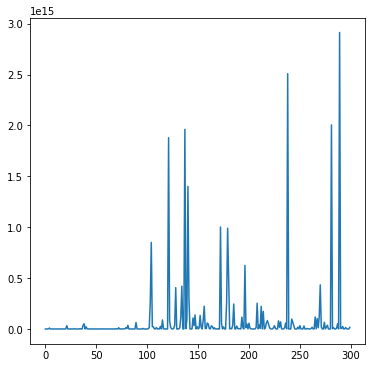

In [173]:
# plot the prediction error 
plt.plot(arraycost_rms)

## VI. ADAM

In [174]:
theta_adam = np.array([0,0])
m = np.zeros(pop_X.shape[1])
v = np.zeros(pop_X.shape[1])

In [175]:
# store starting theta & cost
arraytheta_adam = np.array([theta_adam])
arraycost_adam = np.array([])

In [176]:
## parameters
n_learning_rate = 125
eps = 10**-8
beta1 = 0.9
beta2 = 0.999

In [177]:
for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_adam, pop_X[i], pop_Y[i])
    arraycost_adam = np.append(arraycost_adam, cost)
    
    # update theta with gradient descent
    grad = gradient(theta_adam, pop_X[i], pop_Y[i])
    m = beta1*m + (1-beta1)*grad
    v = beta2*v + (1-beta2)*grad*grad
    m = m/(1-beta1**(i+1))
    v = v/(1-beta2**(i+1))
    theta_adam = theta_adam - n_learning_rate*m/(eps+np.sqrt(v))
    
    arraytheta_adam = np.vstack([arraytheta_adam, theta_adam])

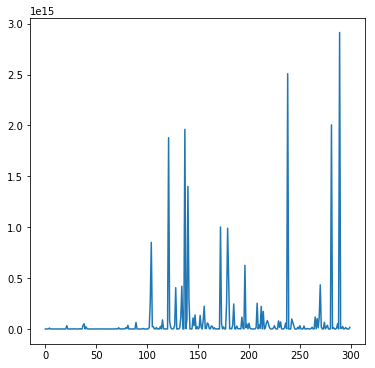

In [178]:
# plot the prediction error 
plt.plot(arraycost_adam)